In [1]:
import os
import sys

import torch

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data import *
from modeling import *
from testing import *

/home/xbuban1/llama_games_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda:3")

model = LlamaGameDescription.from_pretrained(
    "/home/xbuban1/LlamaGames/runs/34_Games_full/models/model_10",
    quantize=False,
    device=device
)
model.eval()

ds = AppDataset(
    root="/home/xbuban1/Games",
    data_name="apps_filtered_en.json",
    images_subdir="images",
    max_image_stack_size=10,
    include_hints=False,
    device=device,
    seed=42
)
hinted_ds = AppDataset(
    root="/home/xbuban1/Games",
    data_name="apps_filtered_en.json",
    images_subdir="images",
    max_image_stack_size=10,
    include_hints=True,
    device=device,
    seed=42
)

train_ds, val_ds = torch.utils.data.random_split(
    ds,
    [0.8, 0.2],
    generator=torch.Generator().manual_seed(42)
)
hinted_train_ds, hinted_val_ds = torch.utils.data.random_split(
    hinted_ds,
    [0.8, 0.2],
    generator=torch.Generator().manual_seed(42)
)

Loading checkpoint shards: 100%|██████████| 4/4 [02:57<00:00, 44.29s/it]
Some weights of ViTModel were not initialized from the model checkpoint at /home/xbuban1/LlamaGames/runs/34_Games_full/models/model_10/vit and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


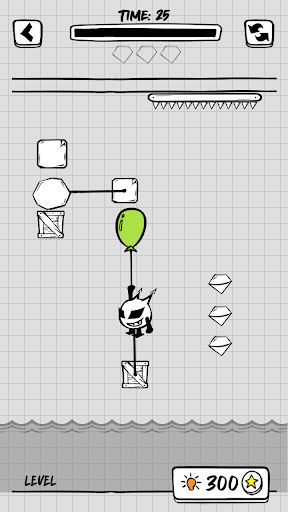

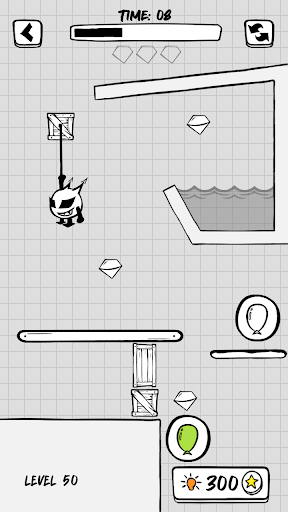

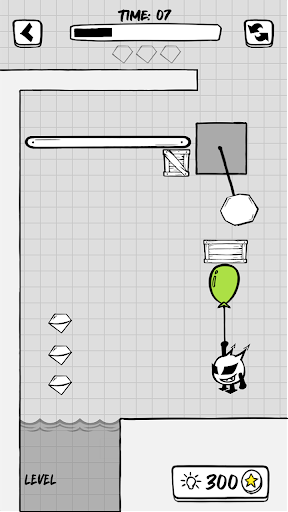

Index: 2601

Game title: Rescue Monster - Rope Puzzle
Short summary: The most fun and simple game in the world!
Long description: The most fun and simple game in the world!
Help the monster.
He is tied up and confined in the room.
Swipe the ballon with your finger and tap.
Can he avoid the pinch of desperate life?
It all depends on you!

--------------------------------------------------------------------------------
Game title: Rescue Monster - Rope Puzzle
Short summary: The most fun and simple game in the world!
Long description: 1. The game is very simple, you just need to pull the rope and rescue the monster.
2. There are many different monsters in the game, each with its own characteristics.
3. You can play offline without an internet connection.
4. The game has a lot of levels, so it will be interesting for a long time.
5. The game is free, but there are some paid items that can help you pass the level faster.

How to play:
1. Pull the rope to move the monster.
2. Avoid obstacles

In [9]:
# index -1 means random index
index = -1

app_single(model, hinted_val_ds, index, device, preview_image_count=3)
# app_single(model, val_ds, index, device, preview_image_count=3)